In [96]:
import pandas as pd

In [97]:
import numpy as np

In [79]:
bs = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv')

In [98]:
bs.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,2,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,1,352.874000


In [99]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


In [100]:
bs.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.353351,0.065953,0.208814,141.004977,4.128415,1997.830681,0.720079,1.112856,1.201281,2185.836320
std,4.654126,0.478027,0.051459,0.452384,62.086938,2.717103,8.371664,0.648279,0.812755,0.796543,1827.479550
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,8.710000,0.000000,0.027036,0.000000,94.012000,2.000000,1987.000000,0.000000,0.000000,1.000000,922.135101
50%,12.500000,0.000000,0.054021,0.000000,142.247000,4.000000,1999.000000,1.000000,1.000000,1.000000,1768.287680
75%,16.750000,1.000000,0.094037,0.000000,185.855600,6.000000,2004.000000,1.000000,2.000000,1.000000,2988.110400
max,30.000000,1.000000,0.328391,2.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,31224.726950


In [101]:
bs.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

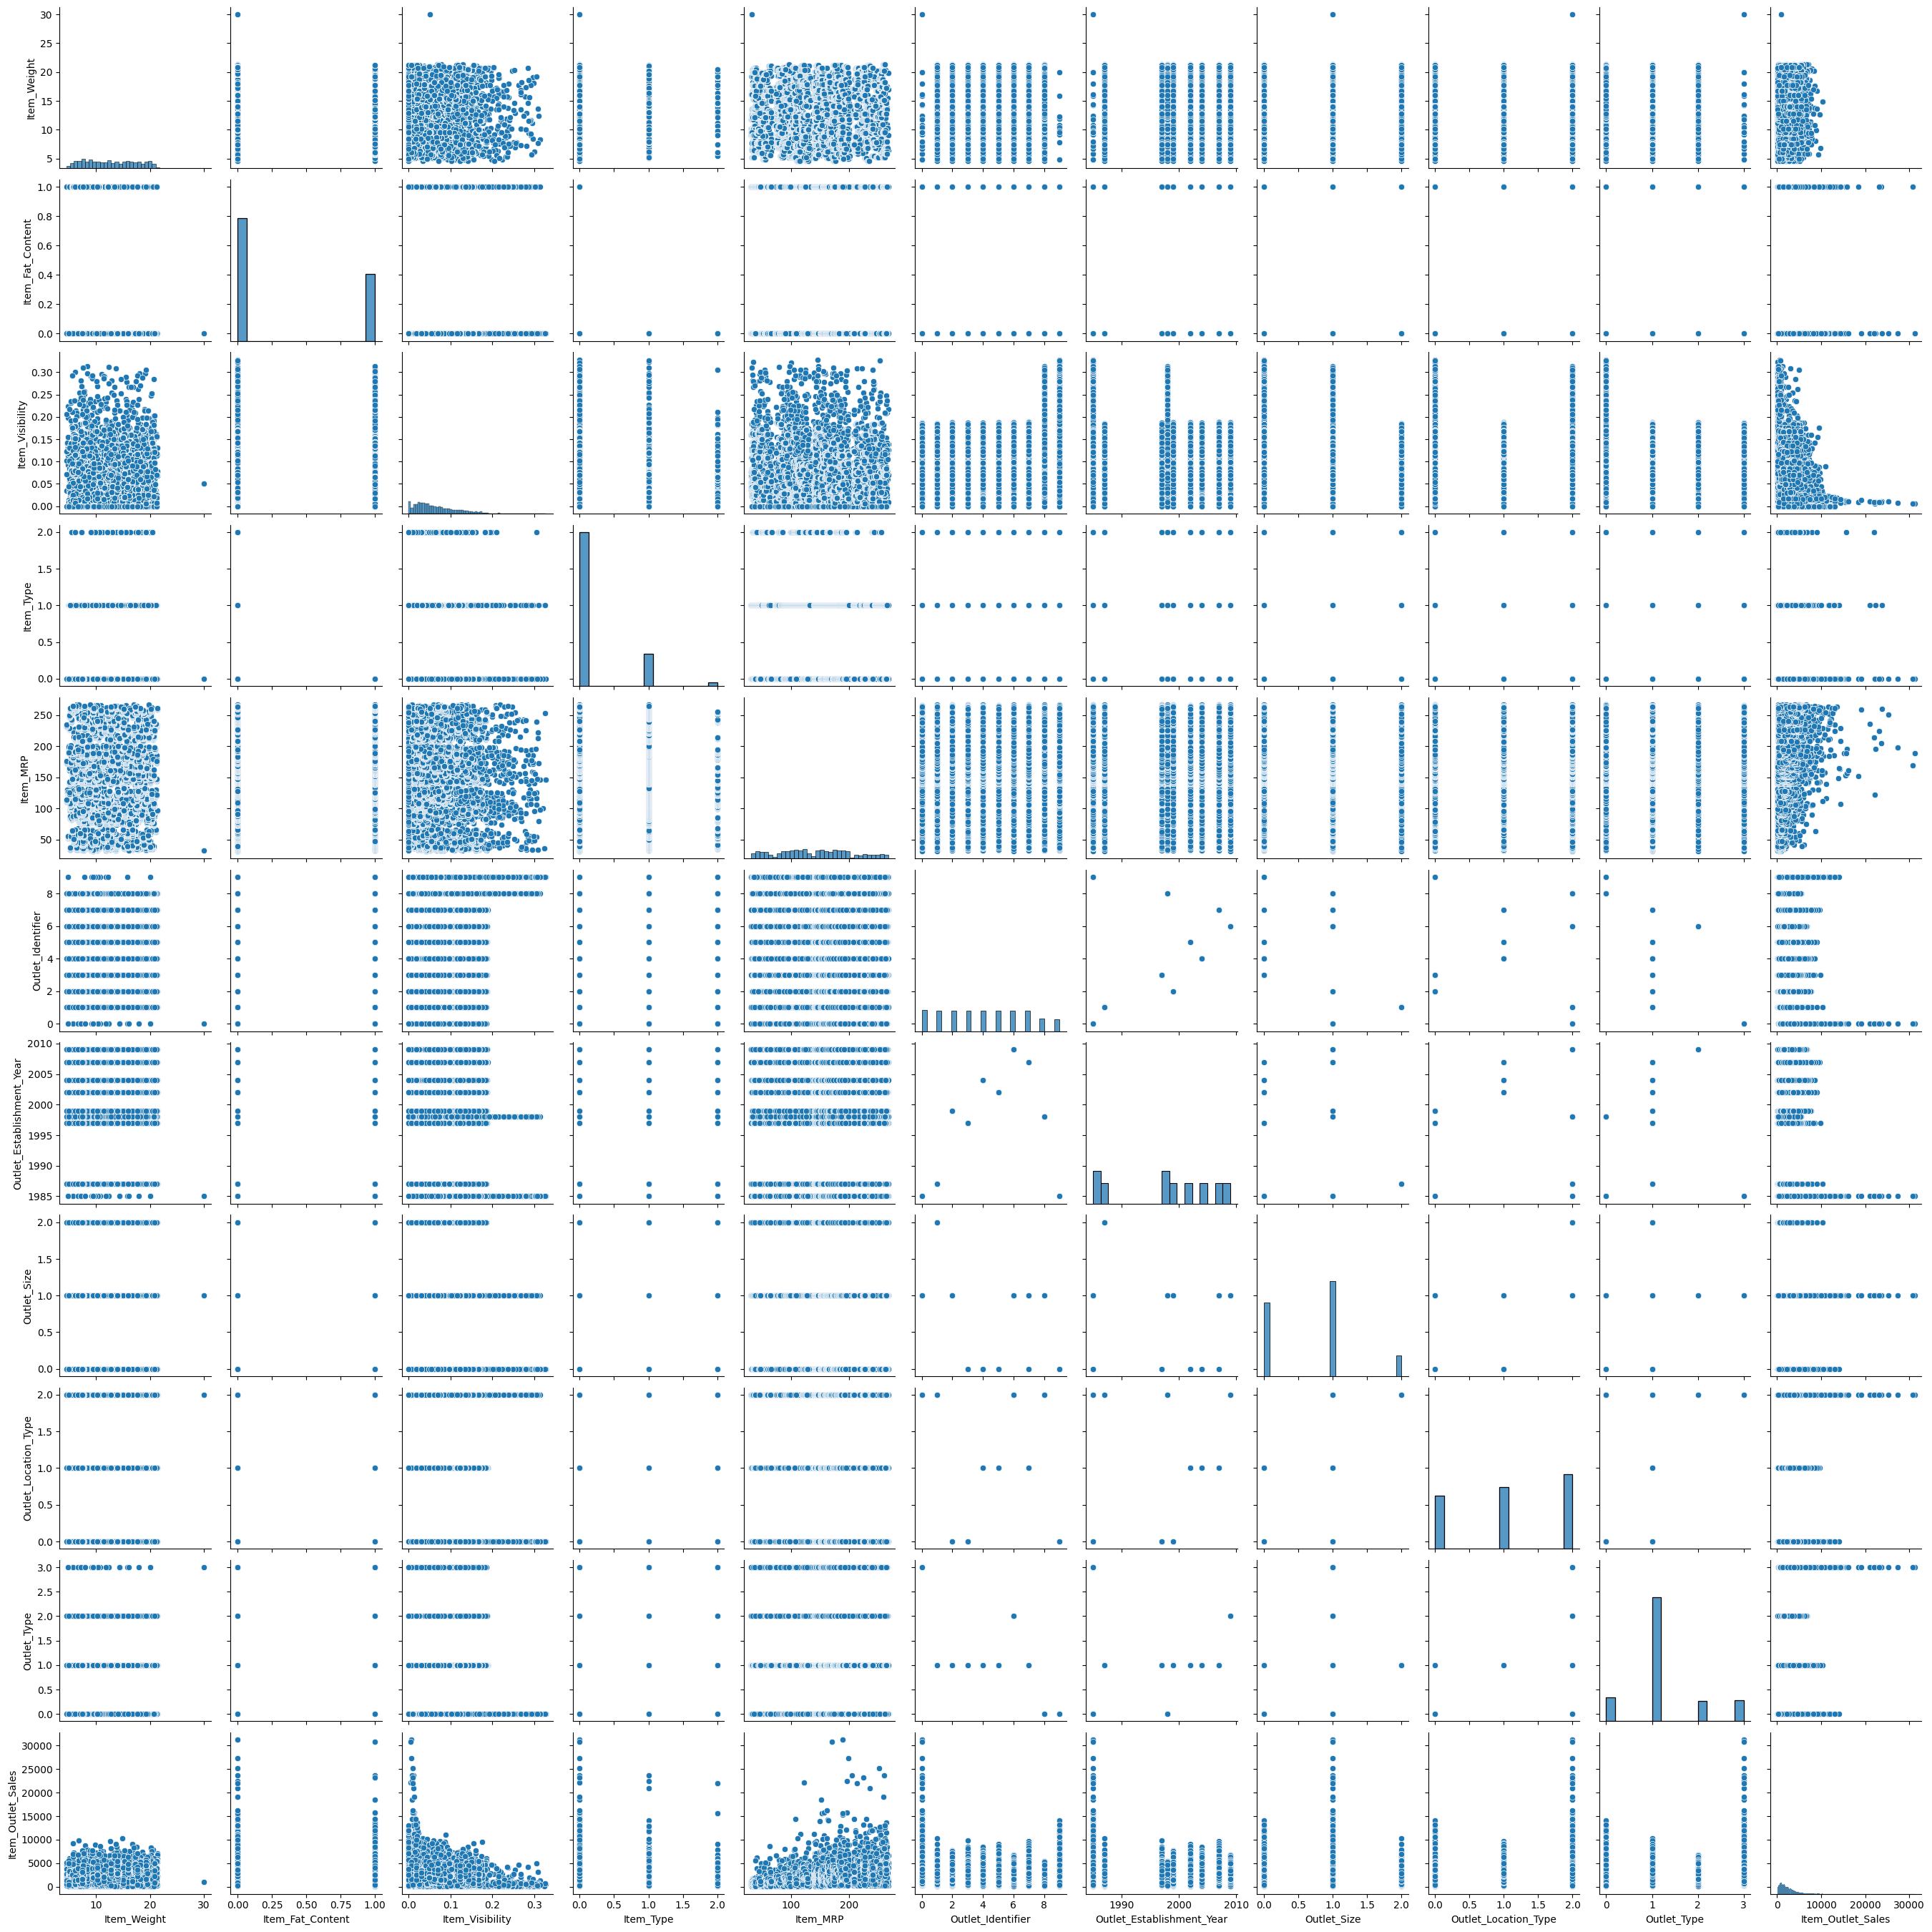

In [102]:
import seaborn as sns
sns.pairplot(bs)


In [104]:
bs[['Item_Identifier']].value_counts()
bs[['Item_Fat_Content']].value_counts()
bs.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)
bs.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1}},inplace=True)
bs[['Item_Type']].value_counts()
bs.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,'Frozen Foods':0,'Dairy':0,'Baking Goods':0,'Canned':0,'Health and Hygiene':1,'Meat':0,'Soft Drinks':0,'Breads':0,'Hard Drinks':0,'Others':2,'Starchy Foods':0,'Breakfast':0,'Seafood':0}},inplace=True)
bs[['Outlet_Identifier']].value_counts()
bs.replace({'Outlet_Identifier':{'OUT027':0,'OUT013':1,'OUT049':2,'OUT046':3,'OUT035':4,'OUT045':5,'OUT018':6,'OUT017':7,'OUT010':8,'OUT019':9}},inplace=True)
bs[['Outlet_Size']].value_counts()
bs.replace({'Outlet_Size':{'Small':0,'Medium':1,'High':2}},inplace=True)
bs[['Outlet_Location_Type']].value_counts()
bs.replace({'Outlet_Location_Type':{'Tier 3' :2,'Tier 2' :1,'Tier 1' :0}},inplace=True)
bs[['Outlet_Type']].value_counts()
bs.replace({'Outlet_Type':{'Supermarket Type1' :1,'Grocery Store' :0,'Supermarket Type3' :3,'Supermarket Type2' :2}},inplace=True)

In [106]:
y=bs['Item_Outlet_Sales']
x=bs[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

In [112]:
from sklearn.impute import SimpleImputer

In [121]:
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [122]:
x_train_dropna = x_train.dropna()
y_train_dropna = y_train[x_train_dropna.index]

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2529)

In [124]:
from sklearn.ensemble import RandomForestRegressor
rforest= RandomForestRegressor(random_state=2529)

In [127]:
rforest. fit(x_train_imputed,y_train)
rforest.fit(x_train_dropna, y_train_dropna)

RandomForestRegressor(random_state=2529)

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2529)


x_train_dropna = x_train.dropna()
y_train_dropna = y_train[x_train_dropna.index]


rforest = RandomForestRegressor(random_state=2529)
rforest.fit(x_train_dropna, y_train_dropna)


imputer = SimpleImputer(strategy='mean')
x_test_imputed = pd.DataFrame(imputer.fit_transform(x_test), columns=x_test.columns)


y_pred = rforest.predict(x_test_imputed)
x_test_dropna = x_test.dropna()
y_test_dropna = y_test[x_test_dropna.index]
y_pred = rforest.predict(x_test_dropna)

In [132]:
y_pred=rforest.predict(x_test)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [91]:
y_pred

NameError: name 'y_pred' is not defined

In [92]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error

In [93]:
mean_absolute_percentage_error(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [95]:
mean_absolute_error(y_pred,y_test)

NameError: name 'y_pred' is not defined